## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
file_path = "C:/Users/yasha/OneDrive/Desktop/Yashaswini/Stats & ML/Lead Scoring Assignment/Lead Scoring Assignment/leads.csv"

# Read the CSV file into a DataFrame
leads = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Handling missing values
leads.fillna(method='ffill', inplace=True)  # Forward fill to replace missing values

# Encoding categorical variables
leads = pd.get_dummies(leads)

## Exploratory Data Analysis and Data preprocessing

In [7]:
# Visualizing the numerical variables
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.pairplot(leads)
plt.show()

In [8]:
# Encoding categorical variables
leads = pd.get_dummies(leads)

In [9]:
# Splitting the data into predictor variables (X) and target variable (y)
X = leads.drop('Converted', axis=1)
y = leads['Converted']

In [10]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3 : Model building and evaluation

In [11]:
# Importing logistic regression model
from sklearn.linear_model import LogisticRegression

In [12]:
# Initializing the logistic regression model
logreg_model = LogisticRegression()

In [13]:
# Training the logistic regression model
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Extracting coefficients
coefficients = logreg_model.coef_[0]

In [15]:
# Creating a DataFrame to store coefficients and corresponding feature names
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

In [16]:
# Sorting the DataFrame by absolute coefficient values to identify top contributing variables
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
top_three_variables = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False).head(3)

print("Top three variables contributing most towards lead conversion probability:")
print(top_three_variables)

Top three variables contributing most towards lead conversion probability:
                                       Feature  Coefficient  \
2                  Total Time Spent on Website     0.001438   
0                                  Lead Number    -0.000002   
9402  Tags_Will revert after reading the email     0.000002   

      Absolute_Coefficient  
2                 0.001438  
0                 0.000002  
9402              0.000002  


## Step 4 : Model Evaluation

In [17]:
# Making predictions on the test set
y_pred = logreg_model.predict(X_test)

In [18]:
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7061688311688312
Confusion Matrix:
 [[959 148]
 [395 346]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.87      0.78      1107
           1       0.70      0.47      0.56       741

    accuracy                           0.71      1848
   macro avg       0.70      0.67      0.67      1848
weighted avg       0.71      0.71      0.69      1848



## Step 5 : Making Predictions

In [20]:
print("Training data shape:", X_train.shape)

Training data shape: (7392, 9454)


In [21]:
# Importing a simpler model
from sklearn.linear_model import Ridge

# Initializing the Ridge regression model
ridge_model = Ridge()

# Training the Ridge model
ridge_model.fit(X_train, y_train)

Ridge()

In [22]:
# Making predictions on the test set
y_pred = ridge_model.predict(X_test)

In [23]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.09858242680065249
R-squared: 0.5895714059876416


In [25]:
# Plotting y_test and y_pred to understand the spread
import matplotlib.pyplot as plt

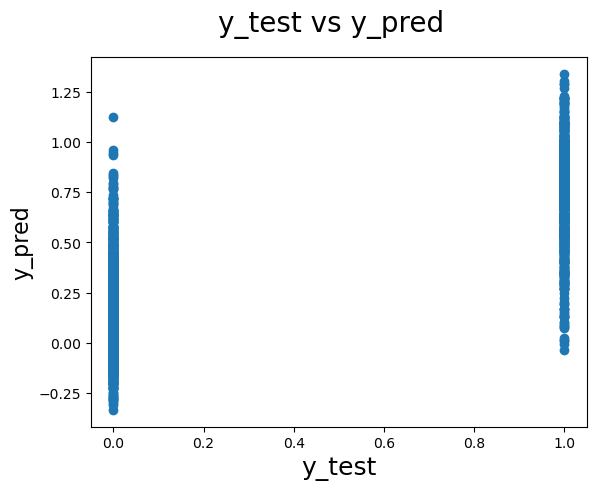

In [26]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [27]:
# Importing logistic regression model
from sklearn.linear_model import LogisticRegression

In [28]:
# Initializing the logistic regression model
logreg_model = LogisticRegression()

In [29]:
# Training the logistic regression model
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Extracting coefficients
coefficients = logreg_model.coef_[0]

In [31]:
# Creating a DataFrame to store coefficients and corresponding feature names
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

In [32]:
# Sorting the DataFrame by absolute coefficient values to identify top contributing variables
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
top_three_variables = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False).head(3)

print("Top three variables contributing most towards lead conversion probability:")
print(top_three_variables)

Top three variables contributing most towards lead conversion probability:
                                       Feature  Coefficient  \
2                  Total Time Spent on Website     0.001438   
0                                  Lead Number    -0.000002   
9402  Tags_Will revert after reading the email     0.000002   

      Absolute_Coefficient  
2                 0.001438  
0                 0.000002  
9402              0.000002  
